# ISLR - Chapter 2 - (Exercises/Applied/Question 10)

<font color='green'> 
**An Introduction to Statistical Learning with Applications in R**  

Chapter 2 - 2.4 Exercises/Applied bölümünde [Boston.csv](https://www.kaggle.com/prasadperera/the-boston-housing-dataset/data?select=housing.csv) verisini kullanarak 10.soruyu cevaplandırdım. 
</font>

**10.** *This exercise involves the Boston housing data set.*

Boston Housing Dataset (Boston Konut Veri Kümesi), Boston MA bölgesindeki konutlarla ilgili olarak ABD Sayım Servisi tarafından toplanan bilgilerden türetilmiştir. Aşağıda veri kümesi sütunları açıklanmaktadır:

* CRIM - ilçelere göre kişi başına suç oranı
* ZN - 25.000 fit karenin üzerindeki parseller için imar edilen konut arazilerinin oranı
* INDUS - ilçe başına perakende olmayan iş dönümü oranı
* CHAS - Charles River dummy değişkeni (yol nehri sınırlarsa 1; aksi takdirde 0)
* NOX - nitrik oksit konsantrasyonu (parts per 10 million)
* RM - konut başına ortalama oda sayısı
* AGE - 1940'tan önce inşa edilmiş sahibi tarafından kullanılan birimlerin oranı
* DIS - beş Boston iş merkezine ağırlıklı mesafeler
* RAD - radyal otoyollara erişilebilirlik endeksi
* TAX - 10.000 dolar başına tam değerli emlak vergisi oranı (full-value property-tax rate per $10,000)
* PTRATIO - şehre göre öğrenci-öğretmen oranı 
* B - siyahların ilçeye göre oranı (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town)
* LSTAT - nüfusun yüzde daha düşük durumu (% lower status of the population)
* MEDV - 1000 dolar cinsinden sahibi tarafından kullanılan evlerin medyan değeri

### Önemli Kodlar

- Boston housing datasetini sklearn kütüphanesi üzerinden yüklemek,

- Tüm sütunların değer aralıklarına aynı anda boxplotlar üzerinden incelemek,

- Sütunlardaki outlier değerlerin yüzdelerini öğrenmek,

- Tüm sütunların birbirleriyle olan korelasyonunu görmek için heatmap çizmek,

- Tüm sütunların tek bir sütunla olan korelasyonunun grafiğini aynı yerde göstermek.

### Kaynaklar

- [Kaggle - Boston Housing Dataset Notebook](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)

- Vahit Keskin-Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning (Bölüm 8 - Veri Ön İşleme - 233)

## **(a)** 

*To begin, load in the Boston data set. How many rows are in this data set? How many columns? What do the rows and columns represent?*

### <font color='blue'> 1. Loading Data </font>

In [1]:
import pandas as pd

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv("Boston.csv", header=None, delimiter=r"\s+", names=column_names)

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### <font color='black'> Direkt kütüphaneden bu şekilde de yükleyebilirdik Boston housing veri setini.</font>

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
import numpy as np
# get the data array
data = boston['data']
# get the target array
targets = np.array([boston['target']])
# concatenate the data and targets into a single array for our data frame
allData = np.concatenate((data,np.transpose(targets)), axis=1) 
# set the column names making sure to append the median home value attribute
cols = np.append(boston['feature_names'], 'MEDV') 

bostonDF = pd.DataFrame(allData, columns=cols)

## **(b)** 

*Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.*

### <font color='blue'>2. Data Exploring  </font>

#### <font color='green'> **Sütun adlarını değiştirdim.**</font>

In [4]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
data = boston.rename(columns = {"CRIM":"sucOrani","ZN":"konutAraziOrani","INDUS":"isDonumuOrani","CHAS":"nehirUzeriMi",
                      "NOX":"nitrikOksit","RM":"ortalamaOda","AGE":"SahibindeOlanlarınOrani",
                      "DIS":"isMerkezineUzaklık","RAD":"radyalOtoyolIndeksi","TAX":"emlakVergisiOrani",
                      "PTRATIO":"ogrenciOgretmenOrani","B":"siyahlarınIlceyeOrani","LSTAT":"dusukStatuOrani","MEDV":"evinMedyanDegeri"})

In [6]:
data.head()

,sucOrani,konutAraziOrani,isDonumuOrani,nehirUzeriMi,nitrikOksit,ortalamaOda,SahibindeOlanlarınOrani,isMerkezineUzaklık,radyalOtoyolIndeksi,emlakVergisiOrani,ogrenciOgretmenOrani,siyahlarınIlceyeOrani,dusukStatuOrani,evinMedyanDegeri
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sucOrani                 506 non-null    float64
 1   konutAraziOrani          506 non-null    float64
 2   isDonumuOrani            506 non-null    float64
 3   nehirUzeriMi             506 non-null    int64  
 4   nitrikOksit              506 non-null    float64
 5   ortalamaOda              506 non-null    float64
 6   SahibindeOlanlarınOrani  506 non-null    float64
 7   isMerkezineUzaklık       506 non-null    float64
 8   radyalOtoyolIndeksi      506 non-null    int64  
 9   emlakVergisiOrani        506 non-null    float64
 10  ogrenciOgretmenOrani     506 non-null    float64
 11  siyahlarınIlceyeOrani    506 non-null    float64
 12  dusukStatuOrani          506 non-null    float64
 13  evinMedyanDegeri         506 non-null    float64
dtypes: float64(12), int64(2)
m

#### <font color='green'> **Betimsel değerlerini inceledim.**</font>

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sucOrani,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
konutAraziOrani,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
isDonumuOrani,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
nehirUzeriMi,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrikOksit,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
ortalamaOda,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
SahibindeOlanlarınOrani,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
isMerkezineUzaklık,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radyalOtoyolIndeksi,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
emlakVergisiOrani,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**konutAraziOranı** değişkenine baktığımızda min, %25, %50. değerlerinin **nehirUzeriMi** değişkenine baktığımızda ise min, %25, %50, %75. değerlerinin 0 olduğunu görüyoruz. Kategorik değişkenler olduğu için bu özetler anlaşılabilir. Bu sütunlar evlerin medyan değerini tahmin etmek gibi regresyon görevlerinde faydalı olmayacaktır.

#### <font color='green'> **Tüm sütunların değer aralıklarına boxplot üzerinden baktım.**</font>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

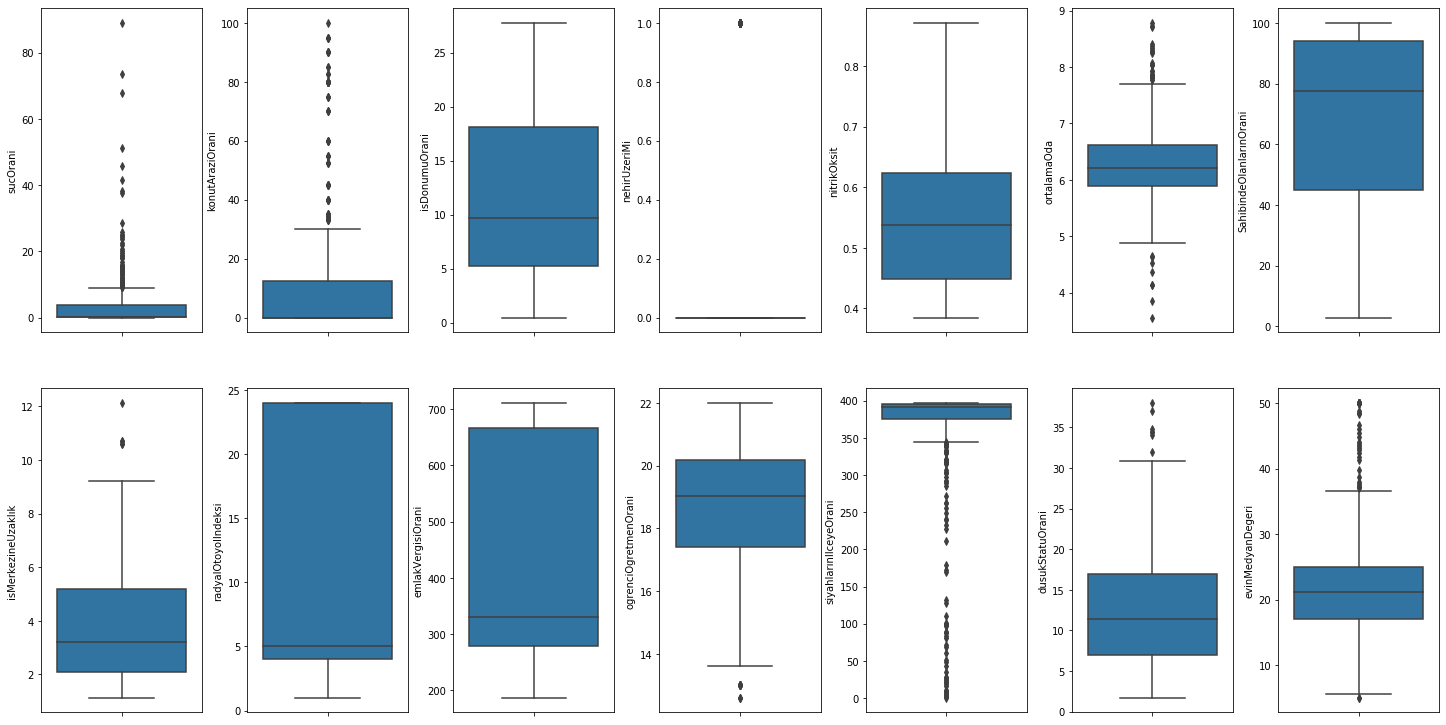

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()
index = 0
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<font color='black'> **sucOranı**, **konutAraziOranı**, **ortalamaOda**,**siyahlarınIlceyeOrani** sütunlarının outlier (aykırı) değerleri var gibi görünüyor.  </font>

#### <font color='green'> Boxplot yöntemiyle tespit ettiğim outlier değerlerin her sütundaki oranına baktım. </font>

In [11]:
data.shape

(506, 14)

In [15]:
for k,v in data.items():
    print(k)

sucOrani
konutAraziOrani
isDonumuOrani
nehirUzeriMi
nitrikOksit
ortalamaOda
SahibindeOlanlarınOrani
isMerkezineUzaklık
radyalOtoyolIndeksi
emlakVergisiOrani
ogrenciOgretmenOrani
siyahlarınIlceyeOrani
dusukStatuOrani
evinMedyanDegeri


In [16]:
for k,v in data.items():
    print(v)

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: sucOrani, Length: 506, dtype: float64
0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: konutAraziOrani, Length: 506, dtype: float64
0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
       ...  
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: isDonumuOrani, Length: 506, dtype: float64
0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: nehirUzeriMi, Length: 506, dtype: int64
0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: nitrikOksit, Length: 506, dtype: float64
0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501

In [21]:
# k: sütunların adları
# v: sütunların değerleri
# v_col: sütunlardaki aykırı değerleri taşıyan değerler

import numpy as np
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)] 
    # print(v_col.shape)
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Sütun %s aykırı değerleri = %.2f%%" % (k, perc))

Sütun sucOrani aykırı değerleri = 13.04%
Sütun konutAraziOrani aykırı değerleri = 13.44%
Sütun isDonumuOrani aykırı değerleri = 0.00%
Sütun nehirUzeriMi aykırı değerleri = 100.00%
Sütun nitrikOksit aykırı değerleri = 0.00%
Sütun ortalamaOda aykırı değerleri = 5.93%
Sütun SahibindeOlanlarınOrani aykırı değerleri = 0.00%
Sütun isMerkezineUzaklık aykırı değerleri = 0.99%
Sütun radyalOtoyolIndeksi aykırı değerleri = 0.00%
Sütun emlakVergisiOrani aykırı değerleri = 0.00%
Sütun ogrenciOgretmenOrani aykırı değerleri = 2.96%
Sütun siyahlarınIlceyeOrani aykırı değerleri = 15.22%
Sütun dusukStatuOrani aykırı değerleri = 1.38%
Sütun evinMedyanDegeri aykırı değerleri = 7.91%


#### <font color='green'>Heatmap aracılığıyla değişkenlerin birbirleriyle olan korelasyonuna baktım.</font>

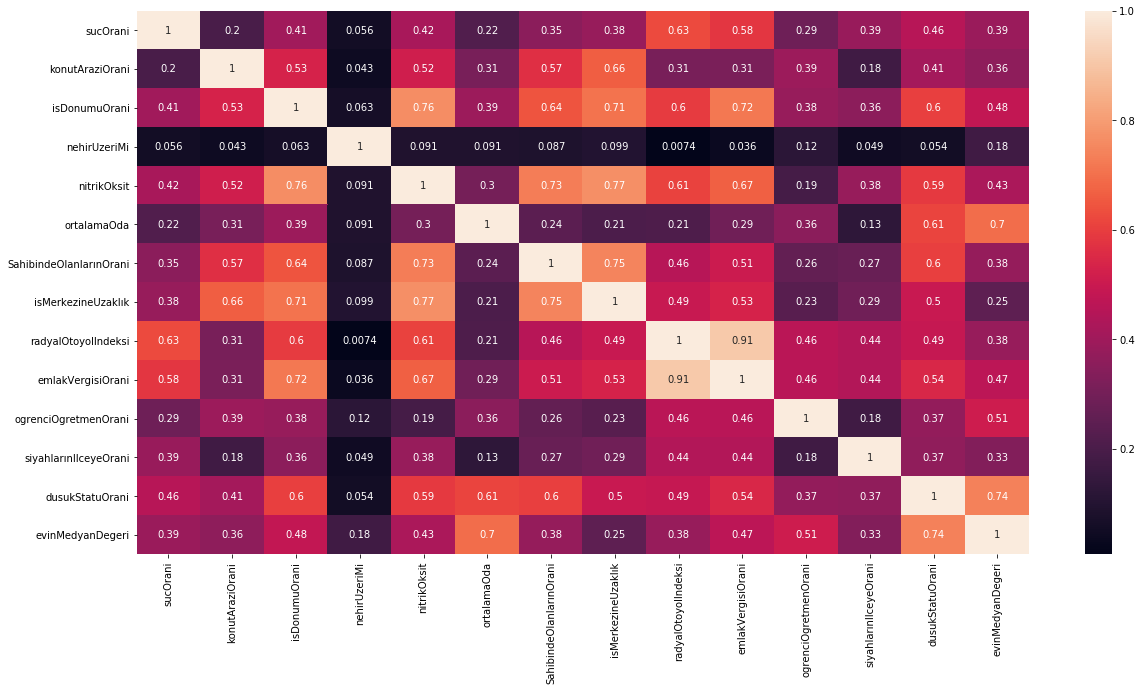

In [20]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True);

- **sucOrani** ile **radyalOtoyolIndeksi** (0.63), **emlakVergisiOrani** (0.58),


- **konutAraziOrani** ile **isDonumuOrani** (0.53), **nitrikOksit** (0.52), **SahibindenOlanlarınOrani** (0.57), **isMerkezineUzaklık** (0.66), 


- **isDonumuOrani** ile **nitrikOksit** (0.76), **SahibindenOlanlarınOrani** (0.64), **isMerkezineUzaklık** (0.71), **radyalOtoyolIndeksi** (0.6), **emlakVergisiOrani** (0.72), **dusukStatuOrani** (0.6)


- **nitrikOksit** ile **SahibindenOlanlarınOrani** (0.73), **isMerkezineUzaklık** (0.77), **radyalOtoyolIndeksi** (0.61), **emlakVergisiOrani** (0.67), **dusukStatuOrani** (0.59)


- **ortalamaOda** ile **dusukStatuOrani** (0.61), **evinMedyanDegeri** (0.7)

arasında korelasyon var.

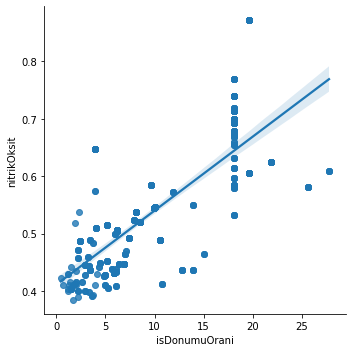

In [89]:
sns.lmplot(x = "isDonumuOrani", y = "nitrikOksit", data = data);

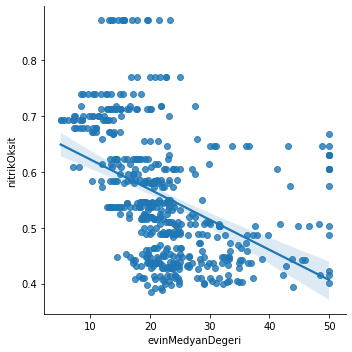

In [90]:
sns.lmplot(x = "evinMedyanDegeri", y = "nitrikOksit", data = data);

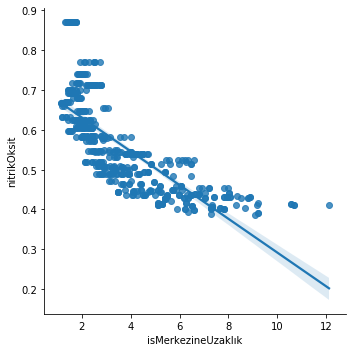

In [91]:
sns.lmplot(x = "isMerkezineUzaklık", y = "nitrikOksit", data = data);

*Net bir şekilde iş merkezine olan uzaklık arttıkça nitrik oksit oranının azaldığını söyleyebiliriz.* 

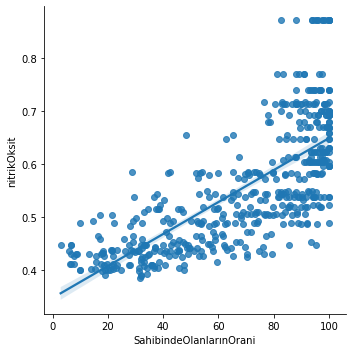

In [92]:
sns.lmplot(x = "SahibindeOlanlarınOrani", y = "nitrikOksit", data = data);

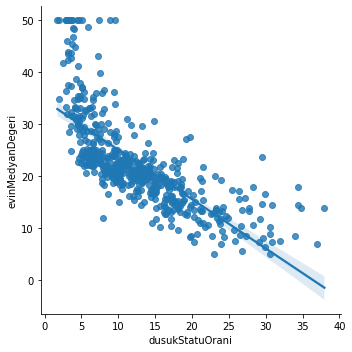

In [93]:
sns.lmplot(x = "dusukStatuOrani", y = "evinMedyanDegeri", data = data);

*Net bir şekilde düşük statü oranı arttıkça evlerin medyan değerinin azaldığını söyleyebiliriz.*

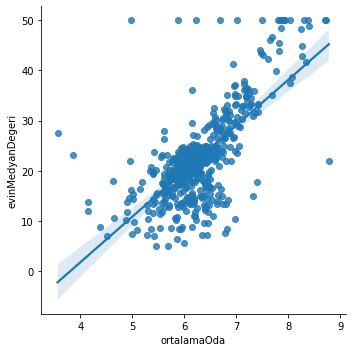

In [96]:
sns.lmplot(x = "ortalamaOda", y = "evinMedyanDegeri", data = data);

## (c)-(d)

*Are any of the predictors associated with per capita crime rate? If so, explain the relationship.*

*Do any of the census tracts of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.*

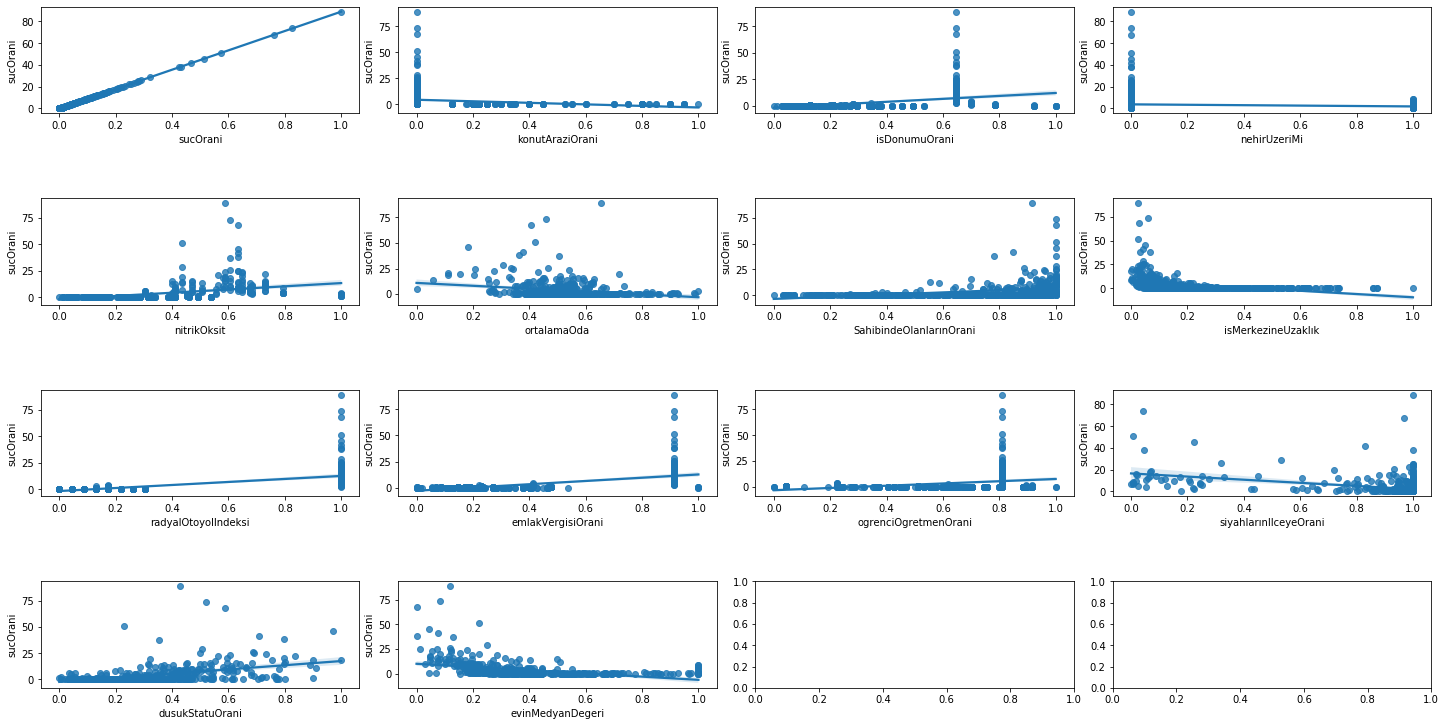

In [59]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against sucOrani
min_max_scaler = preprocessing.MinMaxScaler()

column_sels = np.array(data.columns)
x = data.loc[:,column_sels]
y = data['sucOrani']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### 1. konutAraziOrani ile sucOrani

*konutAraziOrani ile sucOrani arasındaki ilişkiye baktığımızda; 25.000 fit karenin altında inşa edilen konutların olduğu yerlerde suç oranları daha yüksektir yorumu yapıyoruz ancak verinin dengesiz dağılımından dolayı bundan emin olamayız.*

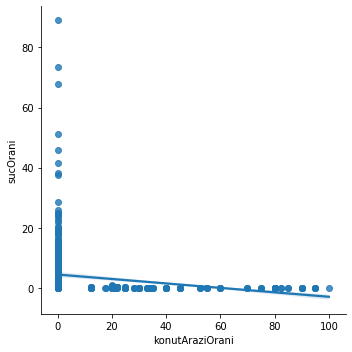

In [106]:
sns.lmplot(x = "konutAraziOrani", y = "sucOrani", data = data);

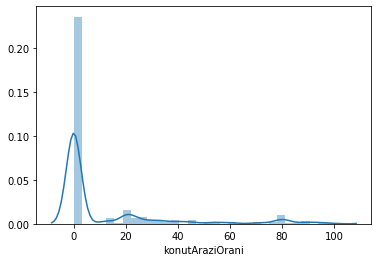

In [61]:
sns.distplot(data["konutAraziOrani"],kde=True);

#### 2. nehirUzeriMi ile sucOrani

*nehirUzeriMi ile sucOrani arasındaki ilişkiye baktığımızda; Nehir boyunca uzanan yollar için ortalama suç oranı daha düşüktür yorumu yapıyoruz ancak verinin dengesiz dağılımından dolayı bundan emin olamayız.*

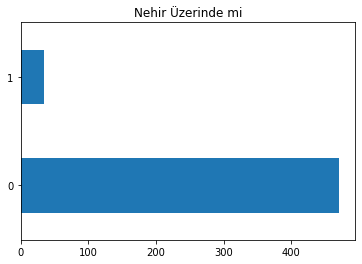

In [64]:
data["nehirUzeriMi"].value_counts().plot.barh().set_title("Nehir Üzerinde mi");

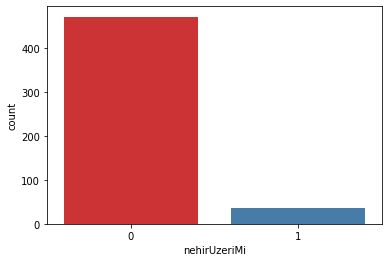

In [108]:
ax = sns.countplot(x='nehirUzeriMi', data=data, palette="Set1");
plt.show() 

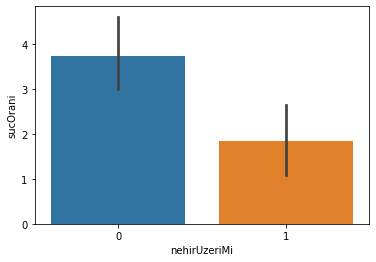

In [102]:
sns.barplot(x = "nehirUzeriMi", y = "sucOrani", data = data); 

#### 3. isDonumuOrani ile sucOrani

*isDonumuOrani ile sucOrani arasındaki ilişkiye baktığımızda bir ilişki gözlemleyemiyoruz.*

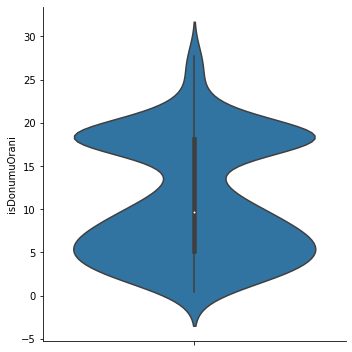

In [68]:
sns.catplot(y = "isDonumuOrani", kind = "violin", data = data);

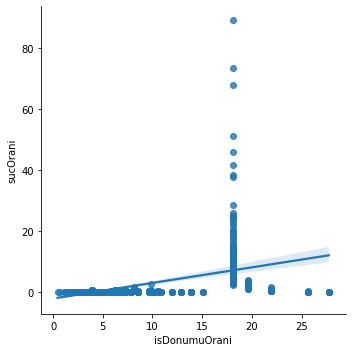

In [104]:
sns.lmplot(x = "isDonumuOrani", y = "sucOrani", data = data);

#### 4. nitrikOksit ile sucOrani

*nitrikOksit ile sucOrani arasındaki ilişkiye baktığımızda; aralarında doğrusal bir ilişki olduğunu söyleyebiliriz.*

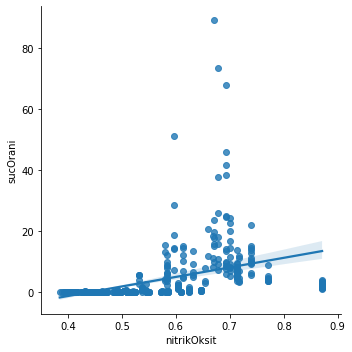

In [75]:
sns.lmplot(x = "nitrikOksit", y = "sucOrani", data = data);  

#### 5. ortalamaOda ile sucOrani

*ortalamaOda ile sucOrani arasındaki ilişkiye baktığımızda; aralarında doğrusal bir ilişki olduğunu söyleyebiliriz. Küçük evlerde suç oranı daha fazla.*

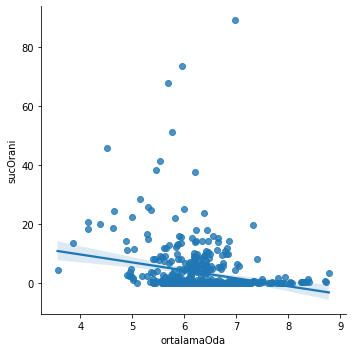

In [76]:
sns.lmplot(x = "ortalamaOda", y = "sucOrani", data = data);  

#### 6. isMerkezineUzaklık ile sucOrani

*isMerkezineUzaklık ile sucOrani arasındaki ilişkiye baktığımızda; aralarında doğrusal bir ilişki olduğunu söyleyebiliriz. İş merkezine yakın oldukça suç oranı daha fazla.*

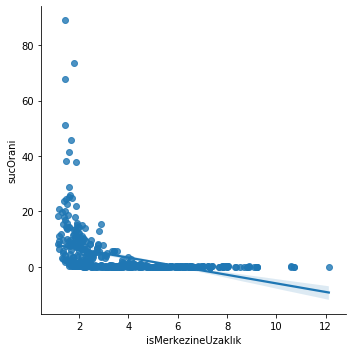

In [84]:
sns.lmplot(x = "isMerkezineUzaklık", y = "sucOrani", data = data);  

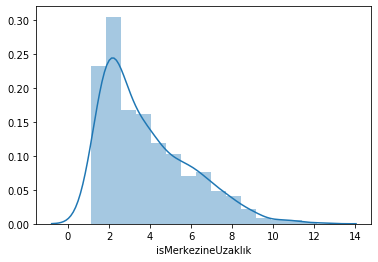

In [85]:
sns.distplot(data["isMerkezineUzaklık"],kde=True);

#### 7. radyalOtoyolIndeksi ile sucOrani

*ortalamaOda ile sucOrani arasındaki ilişkiye baktığımızda; indeksi 24 olan yerde suç oranının daha yüksek olduğunu görüyoruz. Otoyollara yakın banliyölerde ortalama suç oranı daha yüksek yorumu yapabiliriz.*

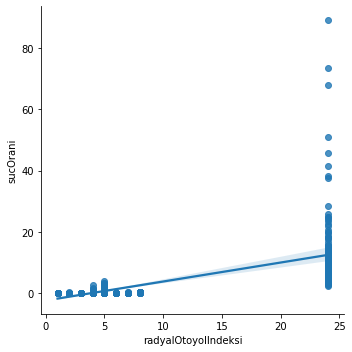

In [77]:
sns.lmplot(x = "radyalOtoyolIndeksi", y = "sucOrani", data = data);  

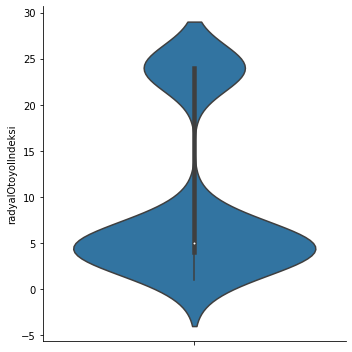

In [81]:
sns.catplot(y = "radyalOtoyolIndeksi", kind = "violin", data = data);

#### 8. ogrenciOgretmenOrani ile sucOrani

*ogrenciOgretmenOrani ile sucOrani arasındaki ilişkiye baktığımızda bir ilişki gözlemleyemiyoruz.*

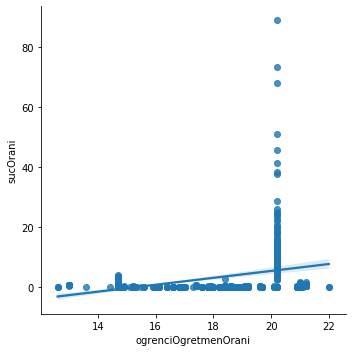

In [78]:
sns.lmplot(x = "ogrenciOgretmenOrani", y = "sucOrani", data = data);  

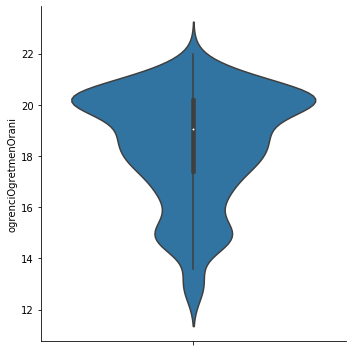

In [79]:
sns.catplot(y = "ogrenciOgretmenOrani", kind = "violin", data = data);

duşukstatü

#### 9. dusukStatuOrani ile sucOrani

*dusukStatuOrani ile sucOrani arasındaki ilişkiye baktığımızda düşük statü oranı arttıkça suç oranının arttığını gözlemliyoruz.*

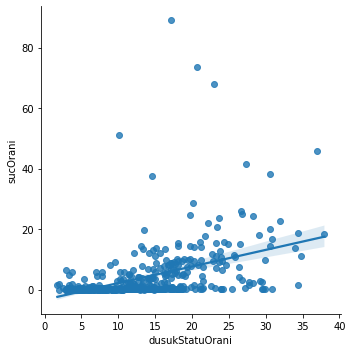

In [86]:
sns.lmplot(x = "dusukStatuOrani", y = "sucOrani", data = data);  

#### 10. evinMedyanDegeri ile sucOrani

*evinMedyanDegeri ile sucOrani arasındaki ilişkiye baktığımızda medyan değeri düşükse suç oranı fazladır yorumu yapabiliyoruz.*

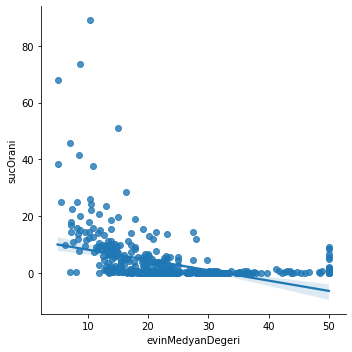

In [88]:
sns.lmplot(x = "evinMedyanDegeri", y = "sucOrani", data = data);

*Kirliliğin fazla olduğu, oda sayısının az olduğu, iş merkezine, otoyollara yakın banliyölerde, düşük statülü yerlerde, medyan değeri düşük evlerde suç oranının daha fazla olduğu yorumunu yapabiliriz.*

## **(e)** 

*How many of the census tracts in this data set bound the Charles river?*

In [100]:
data["nehirUzeriMi"].value_counts()

0    471
1     35
Name: nehirUzeriMi, dtype: int64

*506 sample'dan 35'i nehir üzerinde 471'i değil.*

## **(f)** 

*What is the median pupil-teacher ratio among the towns in this data set?*

In [112]:
data['ogrenciOgretmenOrani'].max()

22.0

In [113]:
data['ogrenciOgretmenOrani'].min()

12.6

In [111]:
data['ogrenciOgretmenOrani'].median()

19.05

## **(g)** 

*Which census tract of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that census tract, and how do those values compare to the overall ranges for those predictors? Comment on your findings.*

In [114]:
data.head()

,sucOrani,konutAraziOrani,isDonumuOrani,nehirUzeriMi,nitrikOksit,ortalamaOda,SahibindeOlanlarınOrani,isMerkezineUzaklık,radyalOtoyolIndeksi,emlakVergisiOrani,ogrenciOgretmenOrani,siyahlarınIlceyeOrani,dusukStatuOrani,evinMedyanDegeri
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [116]:
data['SahibindeOlanlarınOrani'].min()

2.9

In [117]:
df = data.copy()

In [120]:
df[df['SahibindeOlanlarınOrani']==2.9]

,sucOrani,konutAraziOrani,isDonumuOrani,nehirUzeriMi,nitrikOksit,ortalamaOda,SahibindeOlanlarınOrani,isMerkezineUzaklık,radyalOtoyolIndeksi,emlakVergisiOrani,ogrenciOgretmenOrani,siyahlarınIlceyeOrani,dusukStatuOrani,evinMedyanDegeri
41,0.12744,0.0,6.91,0,0.448,6.77,2.9,5.7209,3,233.0,17.9,385.41,4.84,26.6


In [121]:
df[df['SahibindeOlanlarınOrani']==2.9].T

,41
sucOrani,0.12744
konutAraziOrani,0.00000
isDonumuOrani,6.91000
nehirUzeriMi,0.00000
nitrikOksit,0.44800
ortalamaOda,6.77000
SahibindeOlanlarınOrani,2.90000
isMerkezineUzaklık,5.72090
radyalOtoyolIndeksi,3.00000
emlakVergisiOrani,233.00000


In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sucOrani,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
konutAraziOrani,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
isDonumuOrani,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
nehirUzeriMi,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrikOksit,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
ortalamaOda,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
SahibindeOlanlarınOrani,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
isMerkezineUzaklık,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radyalOtoyolIndeksi,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
emlakVergisiOrani,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


* Oldukça düşük bir suç oranına sahip bir bölgede.

* 25.000 fit karenin altında inşa edilen konutların olduğu bir yerde.

* Nehir üzerinde değil. 

* Nitrik oksit oranı ortalamanın altında.

* Ortalama oda sayısı normal.

* İş merkezine uzaklık ortalamanın üzerinde.

* Radyal otoyol indeksi düşük.

* Emlak vergisi oranı ortalamanın çok altında.

* Öğrenci/öğretmen oranı ortalamanın altında.

* Siyahların ilçeye oranı ortalamanın üzerinde.

* Düşük statü oranı ortalamanın altında.

* Evin medyan değeri ortalamanın üzerinde.

## **(h)** 

*In this data set, how many of the census tracts average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the census tracts that average more than eight rooms per dwelling.*

In [125]:
df[df["ortalamaOda"]>8]

,sucOrani,konutAraziOrani,isDonumuOrani,nehirUzeriMi,nitrikOksit,ortalamaOda,SahibindeOlanlarınOrani,isMerkezineUzaklık,radyalOtoyolIndeksi,emlakVergisiOrani,ogrenciOgretmenOrani,siyahlarınIlceyeOrani,dusukStatuOrani,evinMedyanDegeri
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403.0,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307.0,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307.0,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307.0,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330.0,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0


In [126]:
len(df[df["ortalamaOda"]>8])

13